We all know that in ML there are three groups/categeries which are:
    
    1. Supervised Learning:
        so in SL we deal with the labeled data or else we can also say already sorted data 
        where we already know which features/columns are our IV & DV so based on that we decide whether its a 
        regression or classification problem and apply appropriate ML Algorithm's 
        so our target here is based on IV we're going to predict the DV(TV).
        
    2. Unsupervised Learning:
        coming to the USL we deal with the unlabeled data or else unsorted data...
        so we don't have independent variables and dependent variables concept in USL. 
        so our requirement here is to identify the hidden pattern of the data 
        and we form clusters or groups of the data points based on their similarity.
        so will discuss in depth about what are clusters and how we're going to do them 
        
    3. Reinforcement Learning:
        Learns or train by its mistakes

# Mini Project(Mall-Customers-Segmentation-using-K-Means-Clustering)

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
x = df.iloc[:, [3, 4]].values

### Using Elbow Method to find the Optimal number of clusters

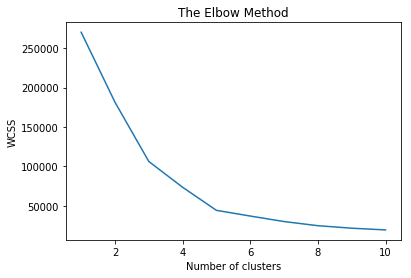

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [5]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### Visualising the clusters

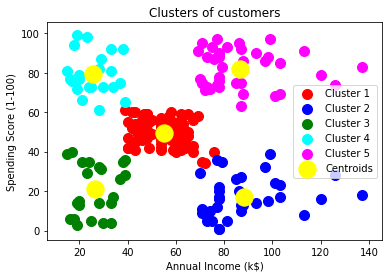

In [6]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Reference Link : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Major Project(Market-Segmentation-using-K-Means-Clustering)

### Problem Statement

In this project we are trying to perform customer market segmentation.

So you have been hired as a DS to a bank in New York City.

The bank has extensive data about their customers.

For the past six months the marketing team at the bank wanted to launch a targeted ad marketing campaign by dividing the customers into at least three different groups/clusters(so we're going to talk a lot about the clusters in this project infact we're going to use k means clustering algorithm in this project).

So basically the marketing team based on the customers mindset will be able to launch a targeted marketing campaign.

They want to learn and understand about their customers.

They want to know the spending habits of the customers.

So that's basically the objective of this project.

### These are what we're going to see in this project:


perform exploratory data analysis and visualize customers data set using distplot, histograms and KDE

learn how to fill out missing data points or null elements for short.

Understand this theory and intuition behind K Means clustering algorithm.

Learn how to find the optimal number of clusters using the Elbow Method.

Apply k means algorithm and sklearn to perform market segmentation 

Understand the intuition behind principle component analysis with PCA for short.

Apply PCA to perform dimensionality reduction using real world data set 

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')

### CUSTID: Identification of Credit Card holder 

### BALANCE: Balance amount left in customer's account to make purchases

### BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

### PURCHASES: Amount of purchases made from account

### ONEOFFPURCHASES: Maximum purchase amount done in one-go

### INSTALLMENTS_PURCHASES: Amount of purchase done in installment

### CASH_ADVANCE: Cash in advance given by the user

### PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

### ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

### PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

### CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

### CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

### PURCHASES_TRX: Number of purchase transactions made

### CREDIT_LIMIT: Limit of Credit Card for user

### PAYMENTS: Amount of Payment done by user

### MINIMUM_PAYMENTS: Minimum amount of payments made by user  

### PRC_FULL_PAYMENT: Percent of full payment paid by user

### TENURE: Tenure of credit card service for user

In [3]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
creditcard_df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [10]:
creditcard_df.shape

(8950, 18)

In [11]:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [12]:
creditcard_df.info()
# 18 features with 8950 points  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [13]:
creditcard_df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Value_Counts

In [14]:
for col in list(creditcard_df):
    print(col)
    print(creditcard_df[col].unique())

CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
ONEOFF_PURCHASES
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
INSTALLMENTS_PURCHASES
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
CASH_ADVANCE
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]
PURCHASES_FREQUENCY
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.583333 0.375    0.6

In [15]:
for col in list(creditcard_df):
    print(col, creditcard_df[col].nunique())

CUST_ID 8950
BALANCE 8871
BALANCE_FREQUENCY 43
PURCHASES 6203
ONEOFF_PURCHASES 4014
INSTALLMENTS_PURCHASES 4452
CASH_ADVANCE 4323
PURCHASES_FREQUENCY 47
ONEOFF_PURCHASES_FREQUENCY 47
PURCHASES_INSTALLMENTS_FREQUENCY 47
CASH_ADVANCE_FREQUENCY 54
CASH_ADVANCE_TRX 65
PURCHASES_TRX 173
CREDIT_LIMIT 205
PAYMENTS 8711
MINIMUM_PAYMENTS 8636
PRC_FULL_PAYMENT 47
TENURE 7


### Describe()

In [16]:
creditcard_df.describe()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [17]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [18]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [19]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Missing Values

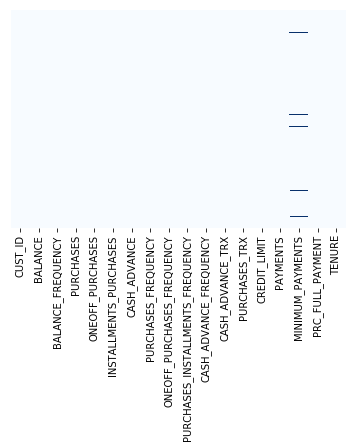

In [20]:
sns.heatmap(creditcard_df.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')

In [21]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [22]:
mean_value = creditcard_df[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].mean()

In [23]:
print(mean_value)

MINIMUM_PAYMENTS     864.206542
CREDIT_LIMIT        4494.449450
dtype: float64


In [24]:
mean_value = creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df['CREDIT_LIMIT'].fillna(value=mean_value, inplace=True)

In [25]:
mean_value = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df['MINIMUM_PAYMENTS'].fillna(value=mean_value, inplace=True)

In [26]:
# cols = creditcard_df[['MINIMUM_PAYMENTS','CREDIT_LIMIT']]

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, 
#                         strategy='mean')
# cols = imputer.fit(cols)
# cols = imputer.transform(cols)

In [27]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [28]:
# import sklearn 
# print (sklearn.__version__)

In [29]:
# pip install -U scikit-learn

### Checking Duplicated Values

In [30]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [31]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

### Exploratory Data Analysis

### Dist Plots

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has bee

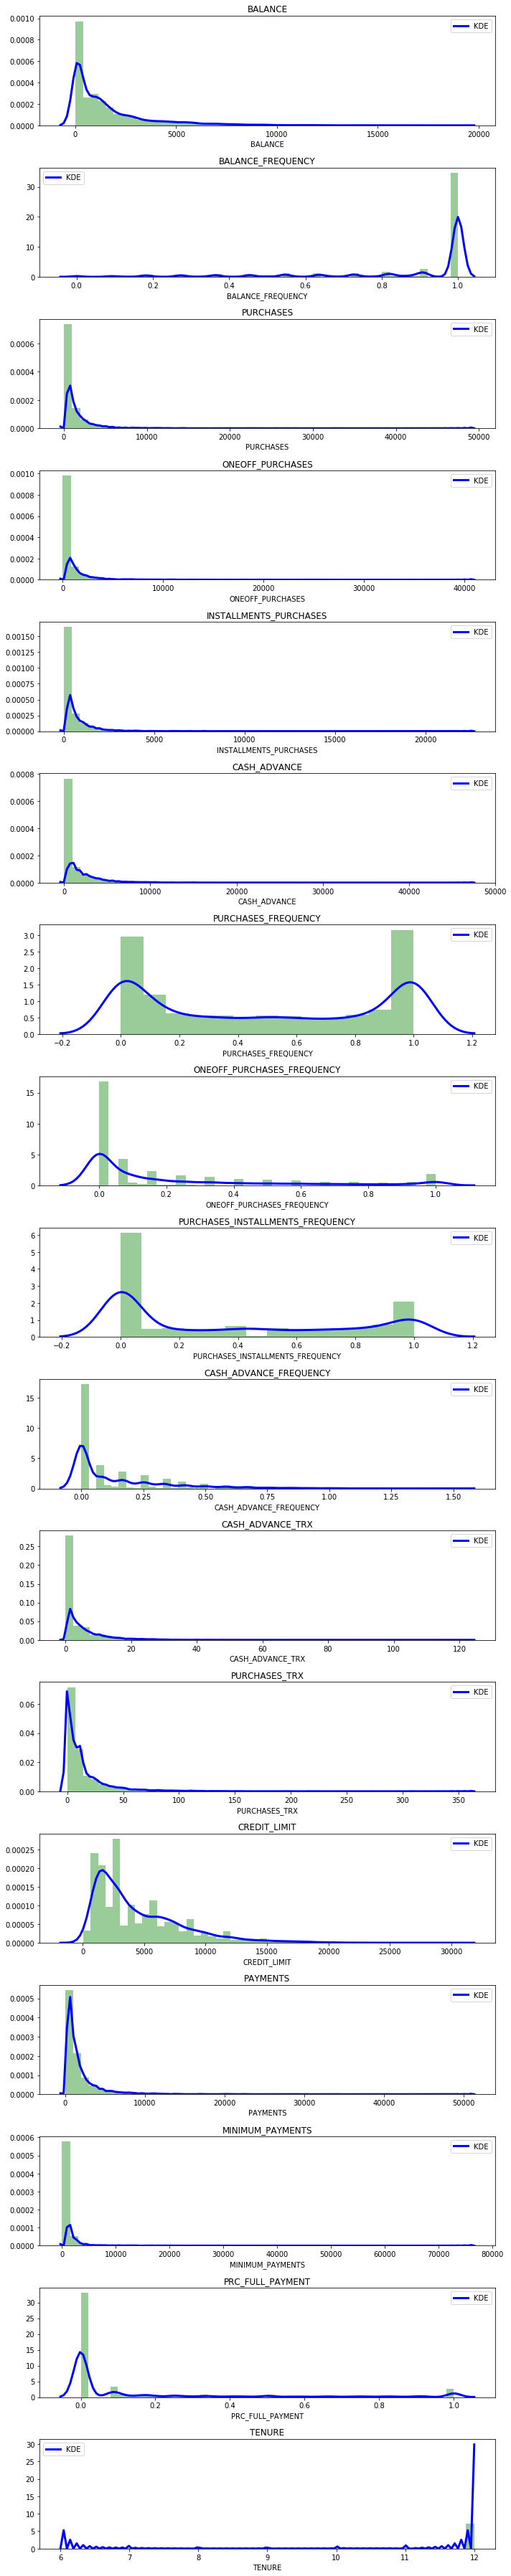

In [32]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()
plt.show()

### Pairplot

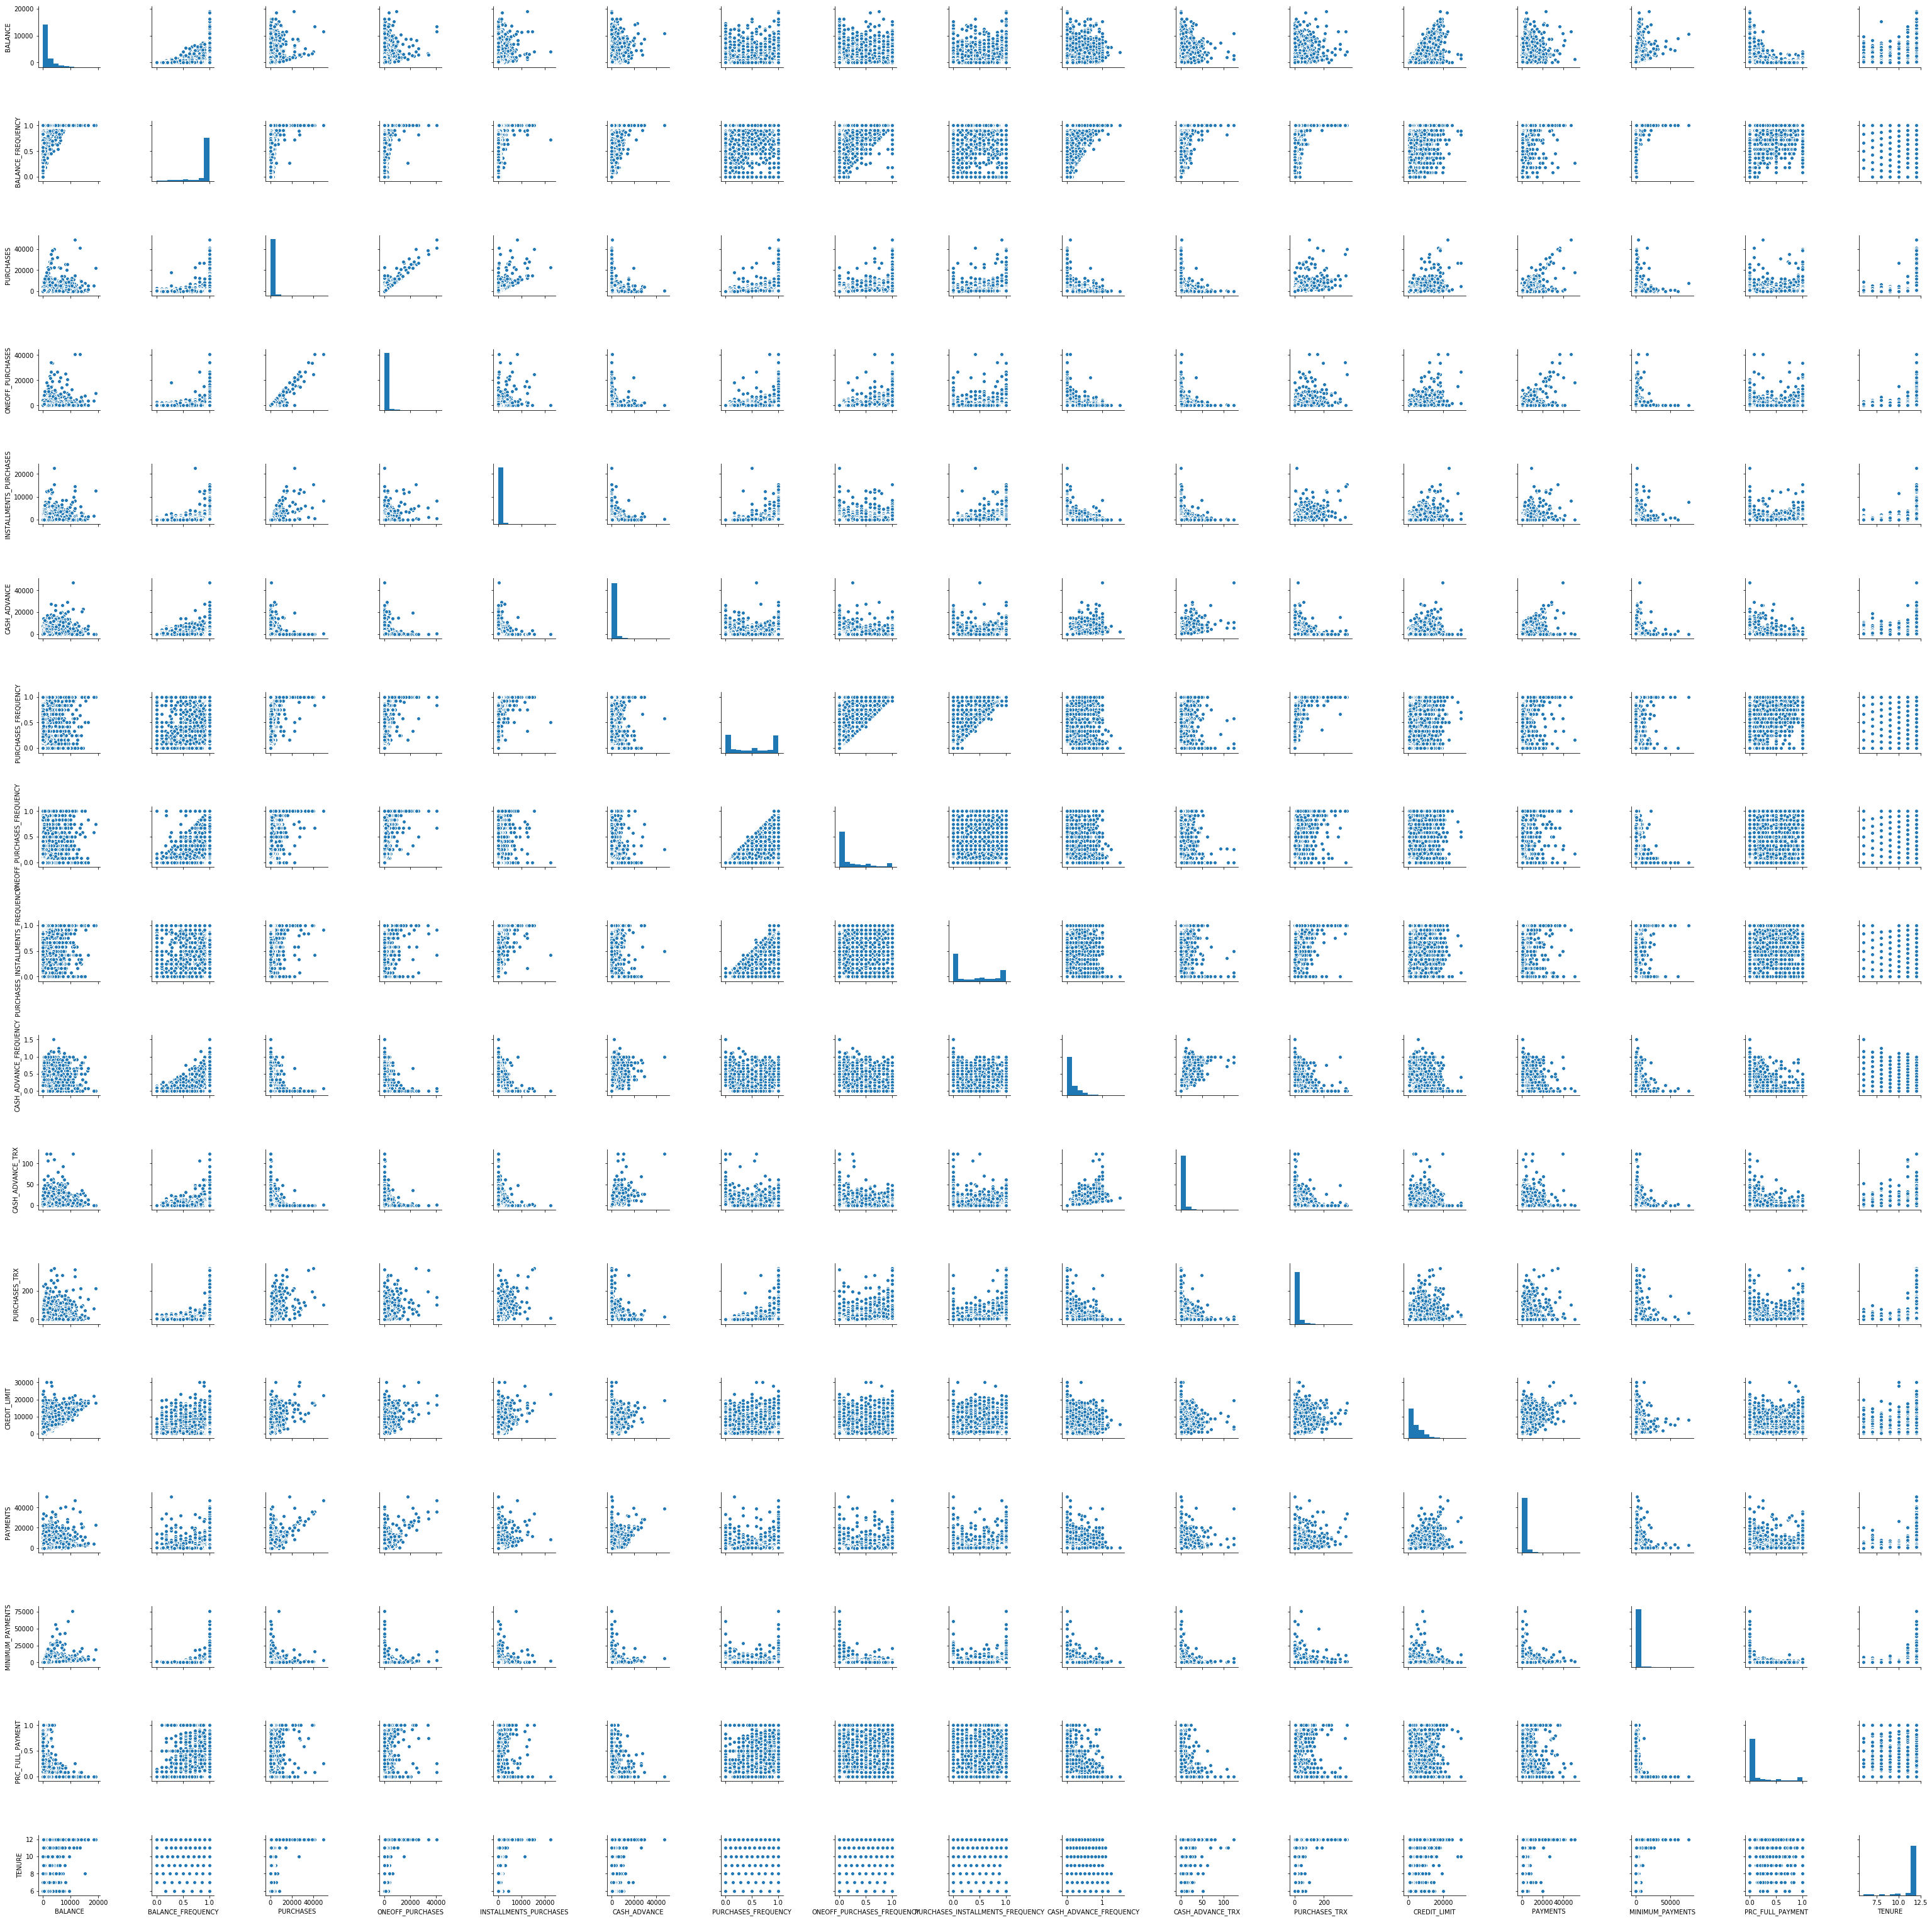

In [33]:
sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

### Haeat Map

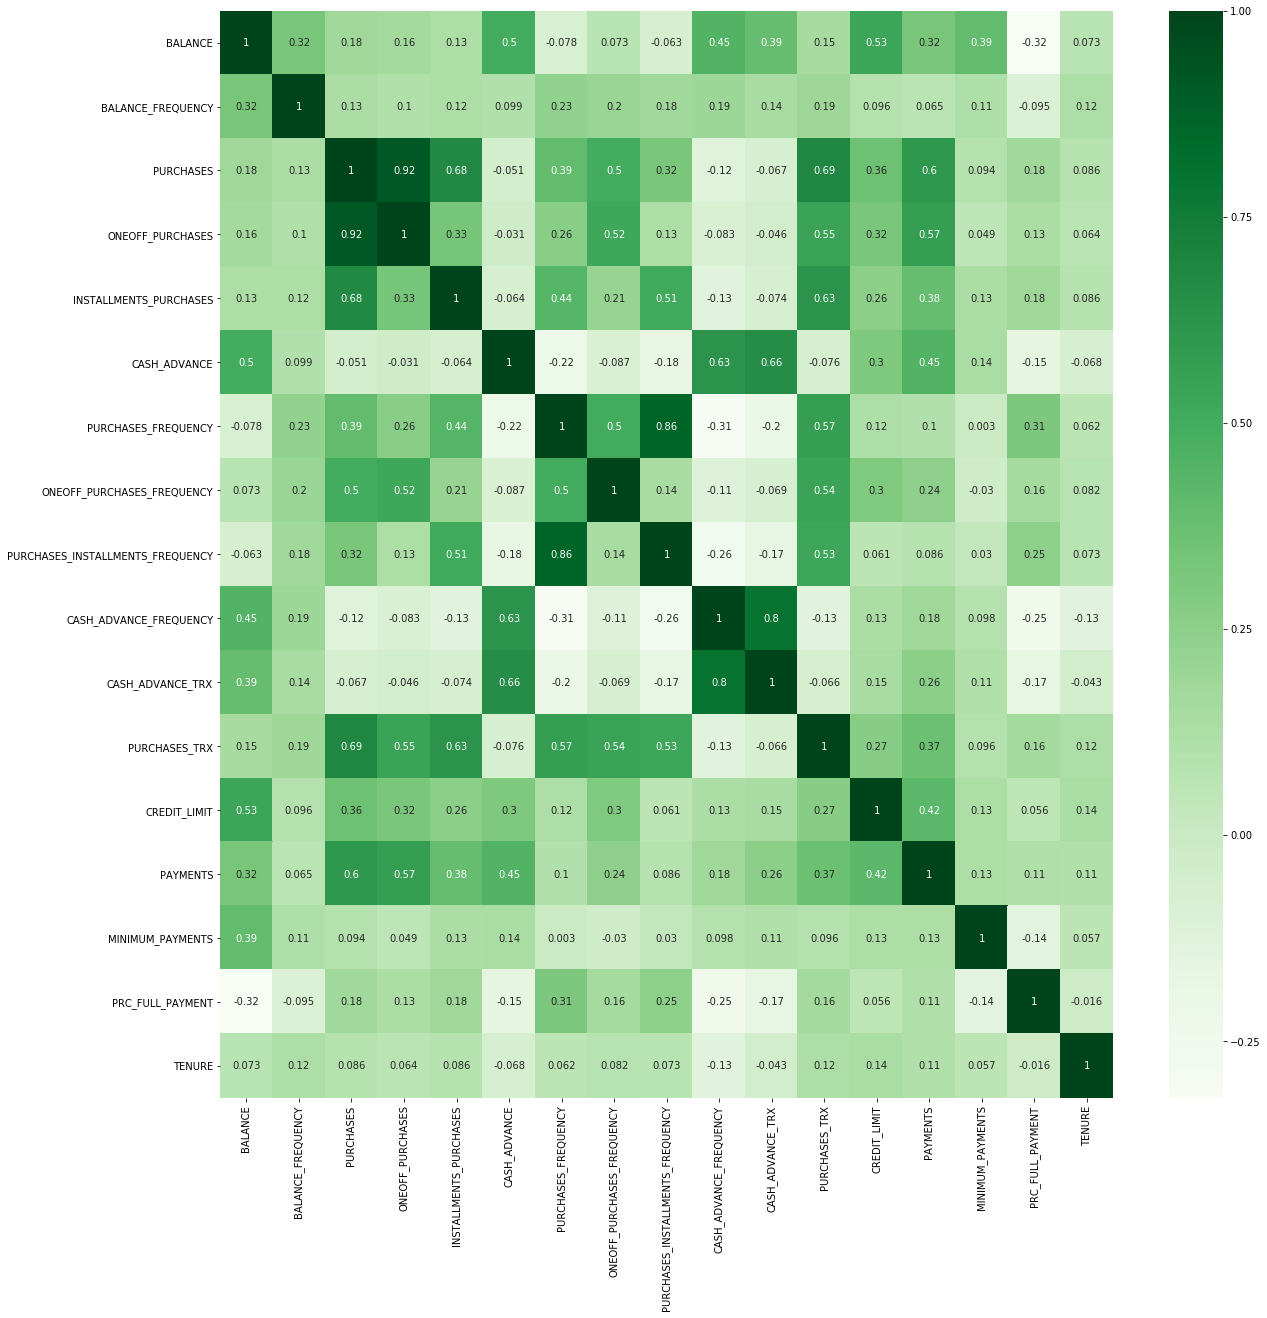

In [34]:
correlations = creditcard_df.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(correlations, annot = True, cmap='Greens')

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

### Feature Scailing

In [35]:
# Let's scale the data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [36]:
creditcard_df_scaled.shape

(8950, 17)

In [37]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### Finding Optimal Number of Clusters

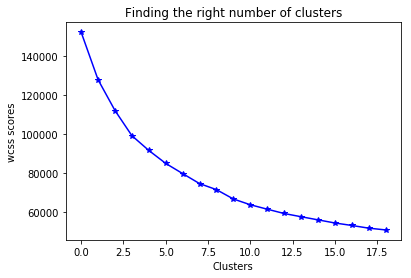

In [39]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    wcss.append(kmeans.inertia_) 

plt.plot(wcss, 'b*-', markersize=10)
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('wcss scores') 
plt.show()
plt.grid()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

### Applying kmeans clustering on the scaled data with 8 clusters

In [40]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [41]:
kmeans.labels_

array([6, 2, 4, ..., 0, 0, 0])

In [42]:
#To display the centroids
kmeans.cluster_centers_.shape

(8, 17)

In [43]:
#centroids represented in the dataframe
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889
1,-0.359532,0.334253,-0.033522,-0.241964,0.365077,-0.362881,0.996877,-0.381926,1.208649,-0.472634,-0.359889,0.193624,-0.258701,-0.214520,-0.029530,0.312657,0.255999
2,1.680141,0.392132,-0.217607,-0.155031,-0.229778,2.000829,-0.472695,-0.207232,-0.414088,1.907125,1.914516,-0.265414,1.022895,0.819760,0.550142,-0.390540,0.070794
3,-0.701050,-2.135919,-0.310042,-0.234849,-0.301517,-0.322887,-0.552623,-0.441389,-0.438172,-0.522023,-0.376648,-0.418343,-0.175016,-0.201839,-0.257074,0.286929,0.201773
4,-0.133093,0.400395,0.544374,0.673542,0.049565,-0.331913,0.982645,1.907929,0.175862,-0.413525,-0.332151,0.623333,0.435052,0.146670,-0.158352,0.445622,0.268609
5,1.044069,0.464401,2.531970,1.837424,2.611177,-0.141149,1.163601,1.571795,1.270158,-0.280397,-0.142502,3.142724,1.310056,1.477173,0.564717,0.264636,0.337262
6,0.009996,0.404363,-0.356499,-0.241530,-0.399094,-0.096633,-0.850171,-0.394075,-0.752068,0.099783,-0.030824,-0.480930,-0.304778,-0.251842,-0.012515,-0.455489,0.274157
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [44]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372
1,816.139718,0.956452,931.585256,190.826473,741.202538,217.892383,0.890445,0.088522,0.844785,0.040565,0.792846,19.522603,3553.189370,1112.130361,795.389071,0.245161,11.859911
2,5061.547122,0.970163,538.283618,335.117167,203.282116,5174.703685,0.300635,0.140636,0.199868,0.516779,16.313993,8.112628,8216.159892,4106.267882,2146.289811,0.039489,11.612059
3,105.297720,0.371291,340.794608,202.635426,138.409646,301.761115,0.268556,0.070783,0.190296,0.030682,0.678481,4.311392,3857.670417,1148.838990,265.105454,0.237636,11.787342
4,1287.452833,0.972121,2166.267830,1710.378973,455.888857,282.834952,0.884734,0.771630,0.434329,0.052394,0.982143,30.203571,6077.345779,2157.737984,495.174078,0.284051,11.876786
5,3737.616647,0.987283,6412.797493,3642.184387,2772.322507,682.876054,0.957360,0.671355,0.869231,0.079034,2.276353,92.826211,9260.968661,6009.414573,2180.256092,0.231116,11.968661
6,1585.281101,0.973061,241.538744,191.546229,50.172145,776.226220,0.149136,0.084897,0.065546,0.155112,3.038475,2.755717,3385.541440,1004.086253,835.040983,0.020492,11.884211
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [45]:
labels.shape # Labels associated to each data point

(8950,)

In [46]:
labels.max()

7

In [47]:
labels.min()

0

In [48]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([0, 4, 7, ..., 5, 5, 5])

In [49]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


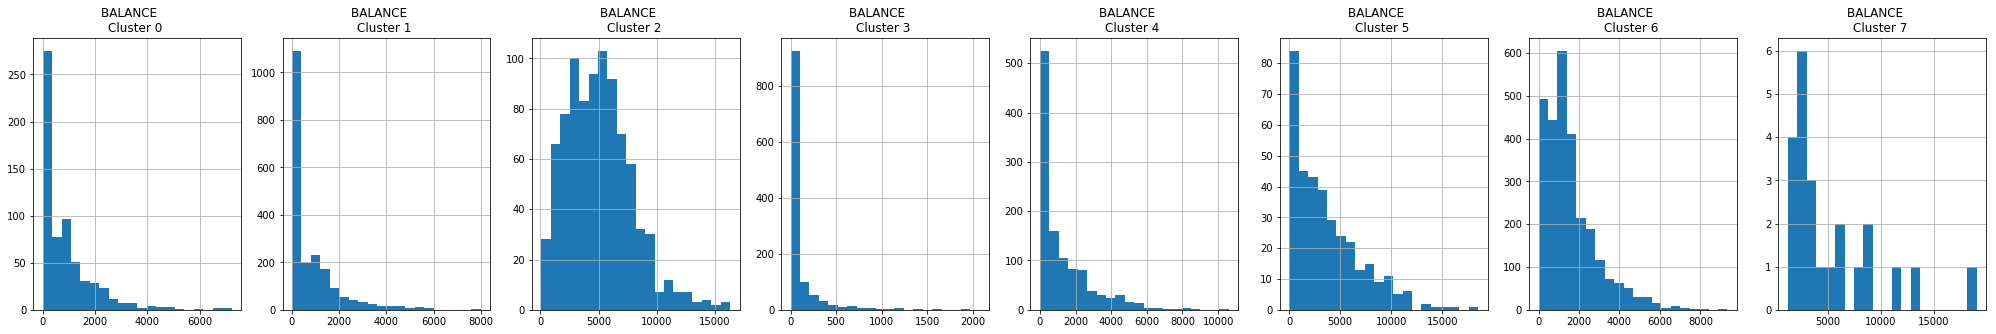

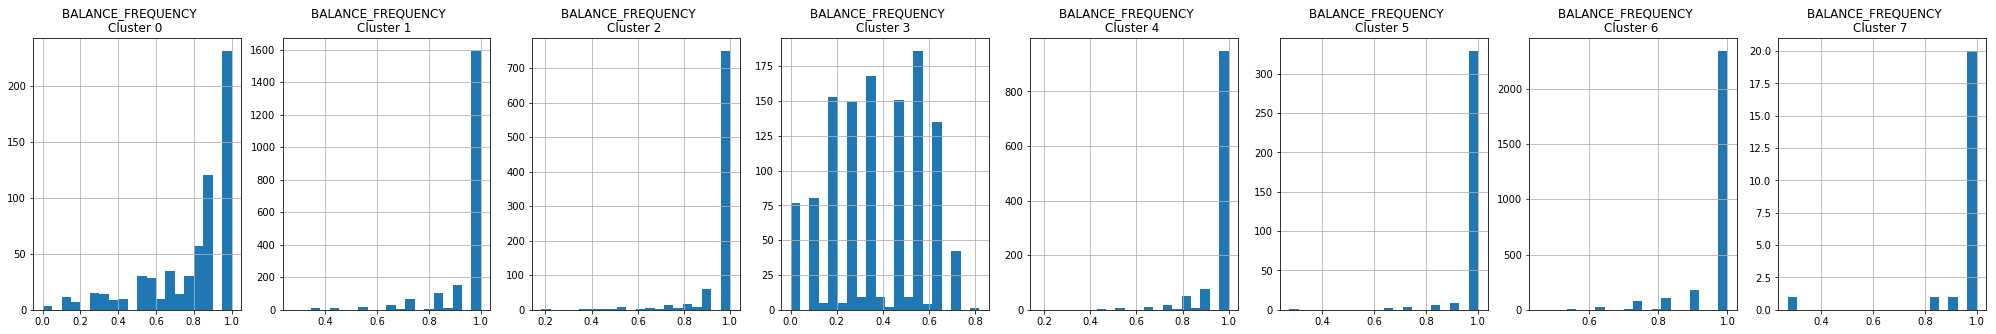

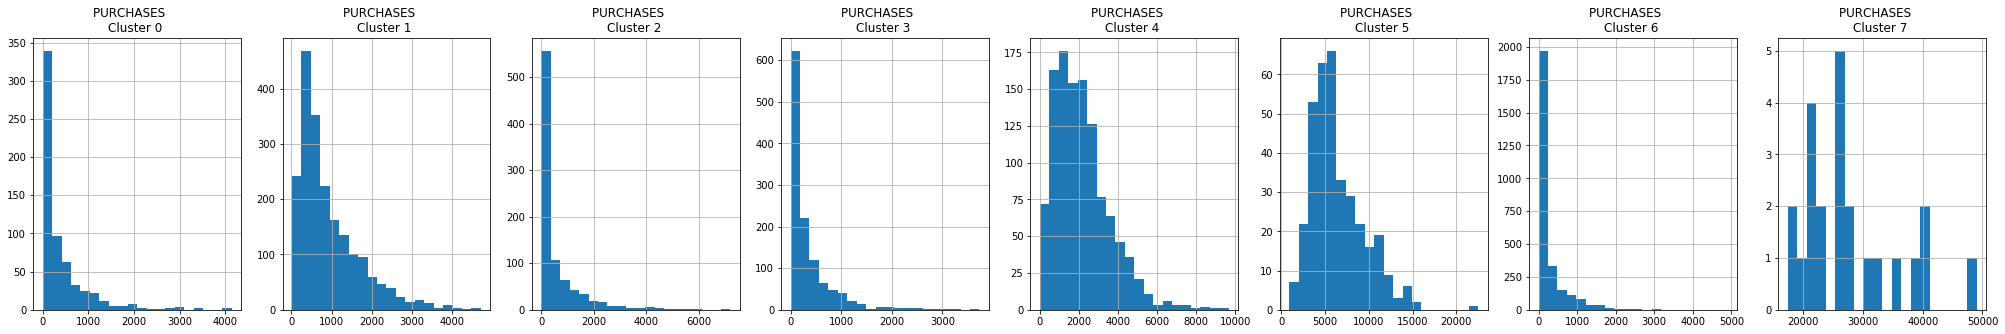

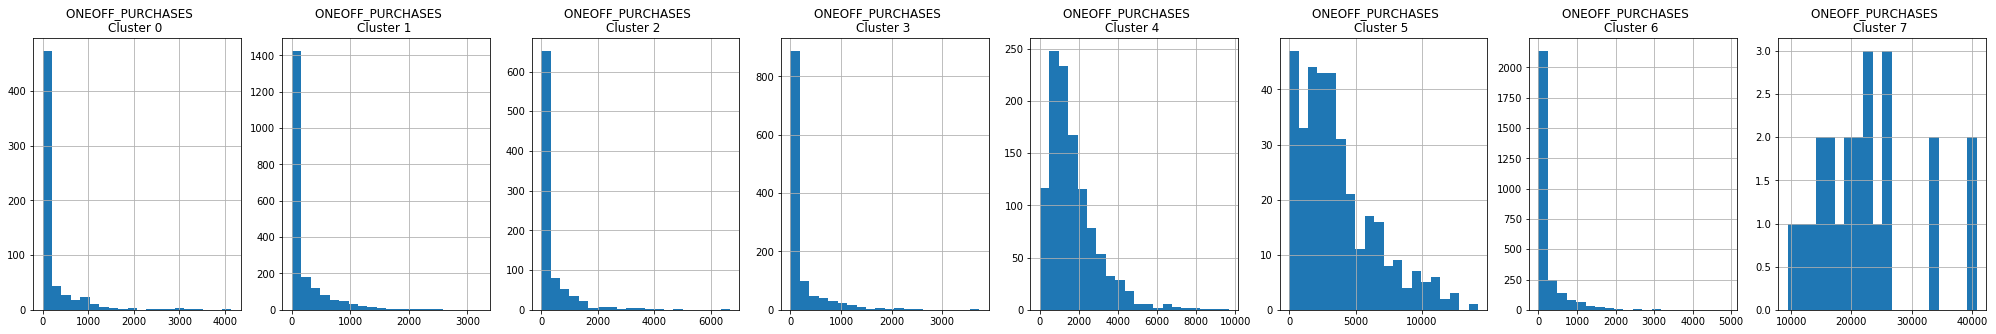

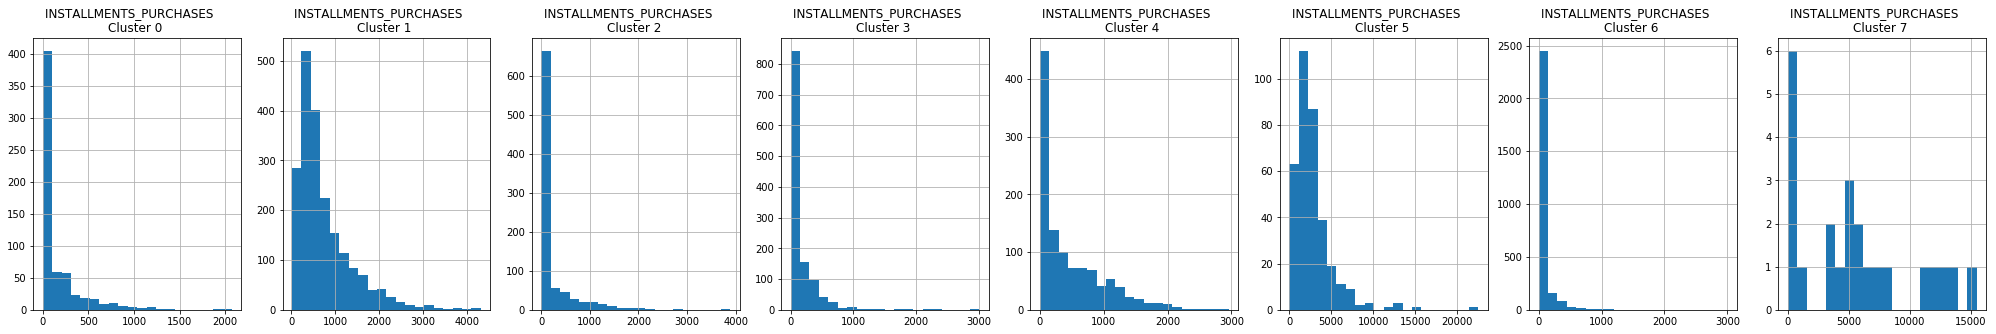

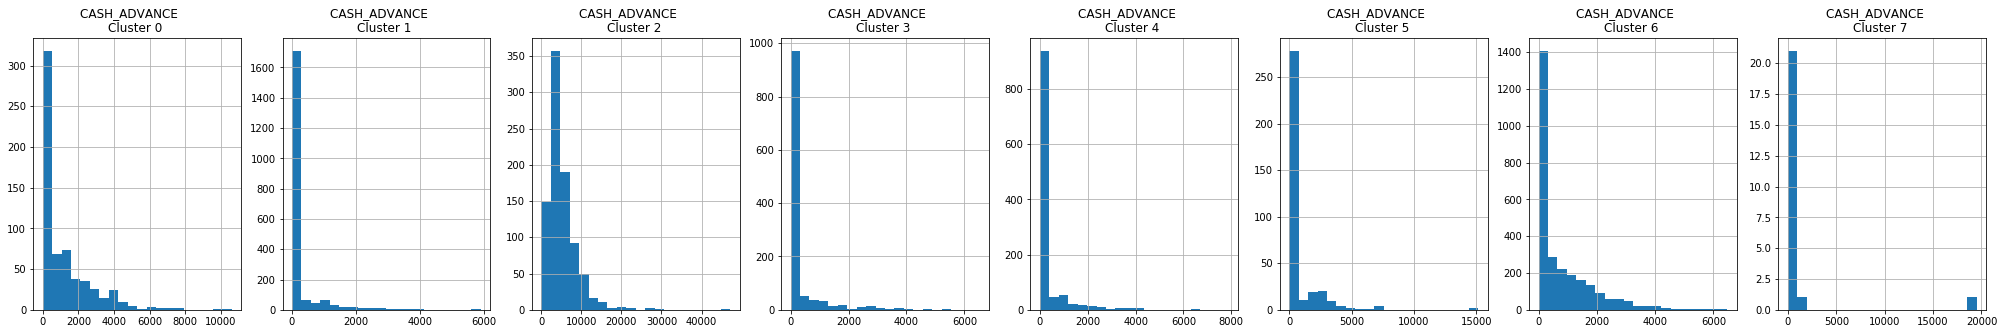

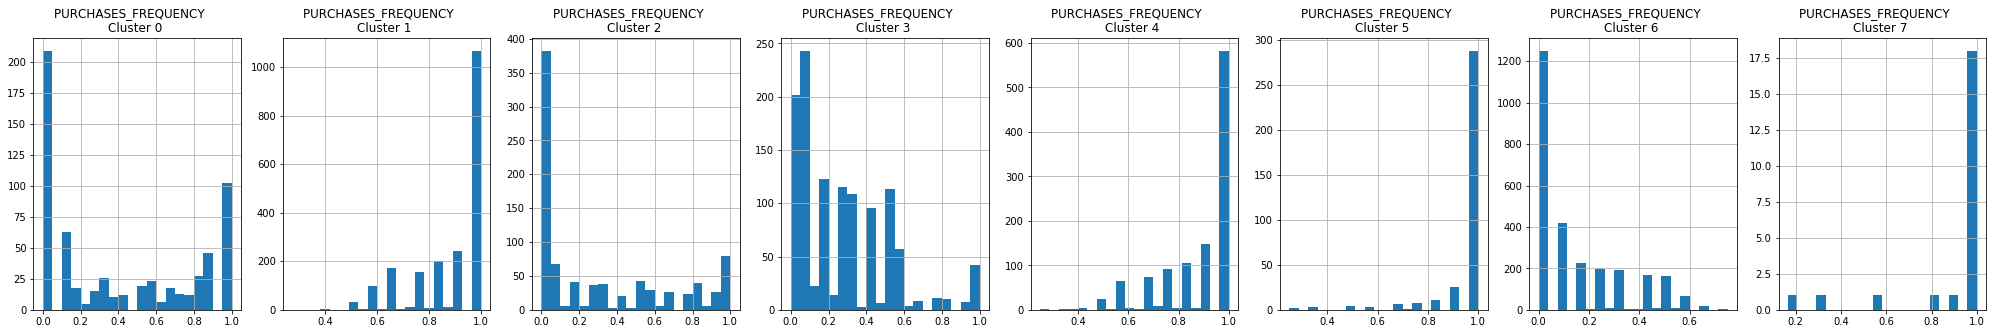

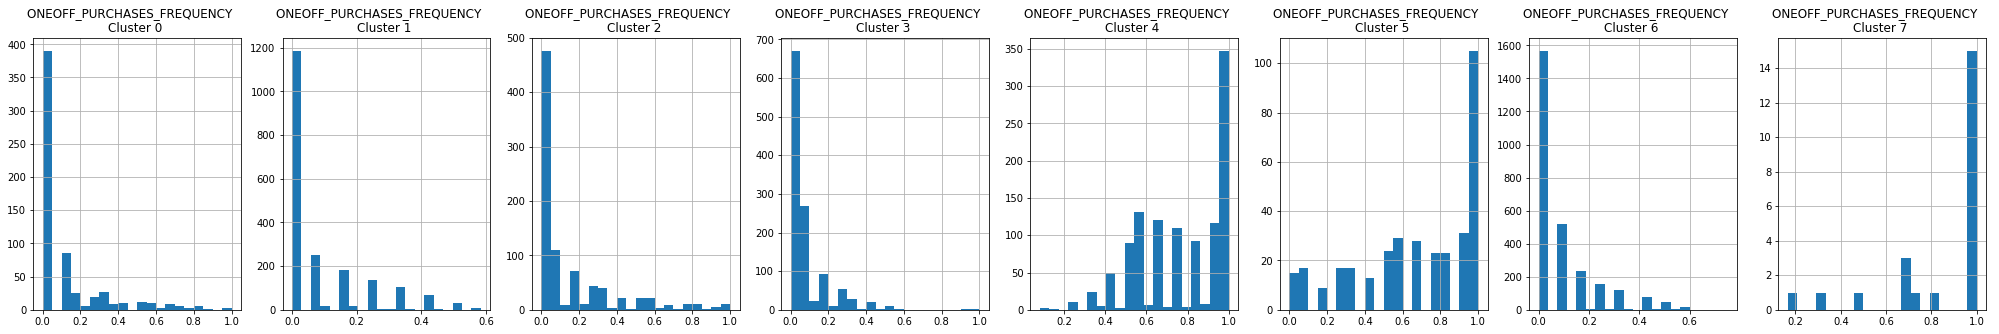

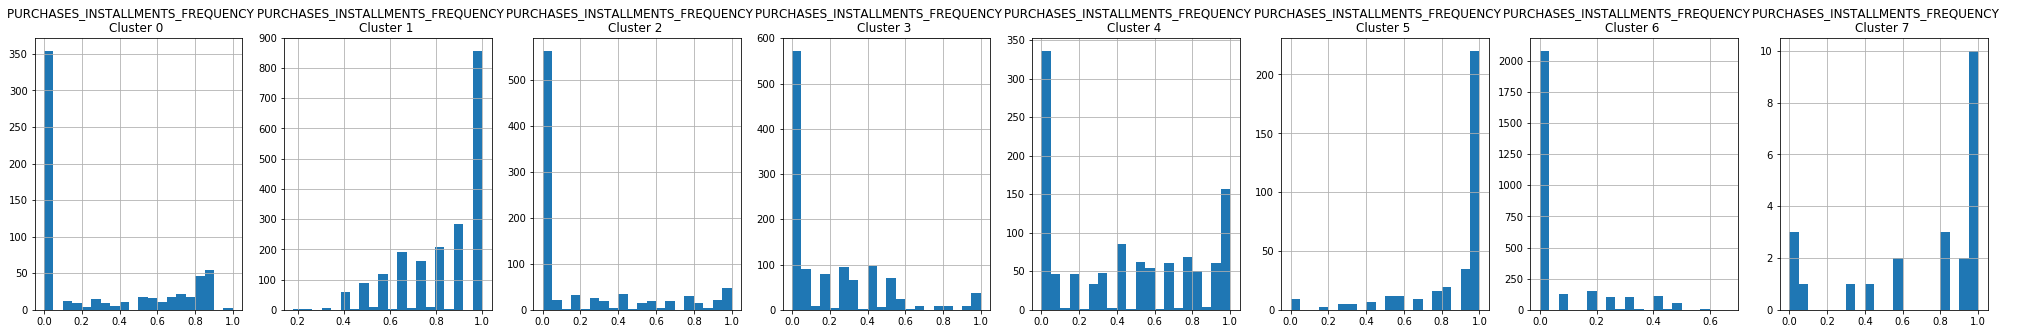

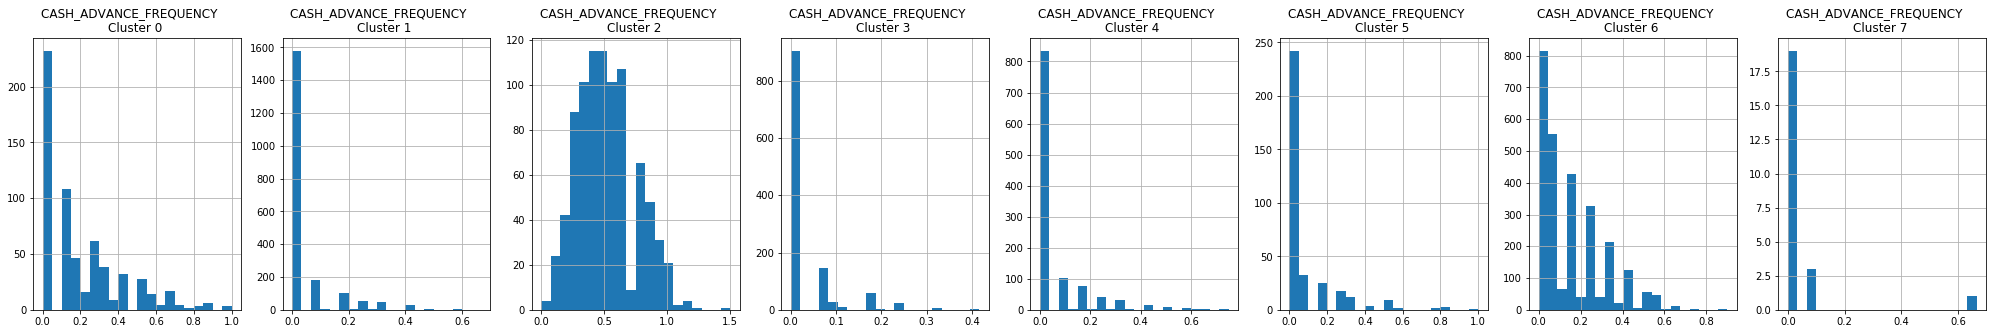

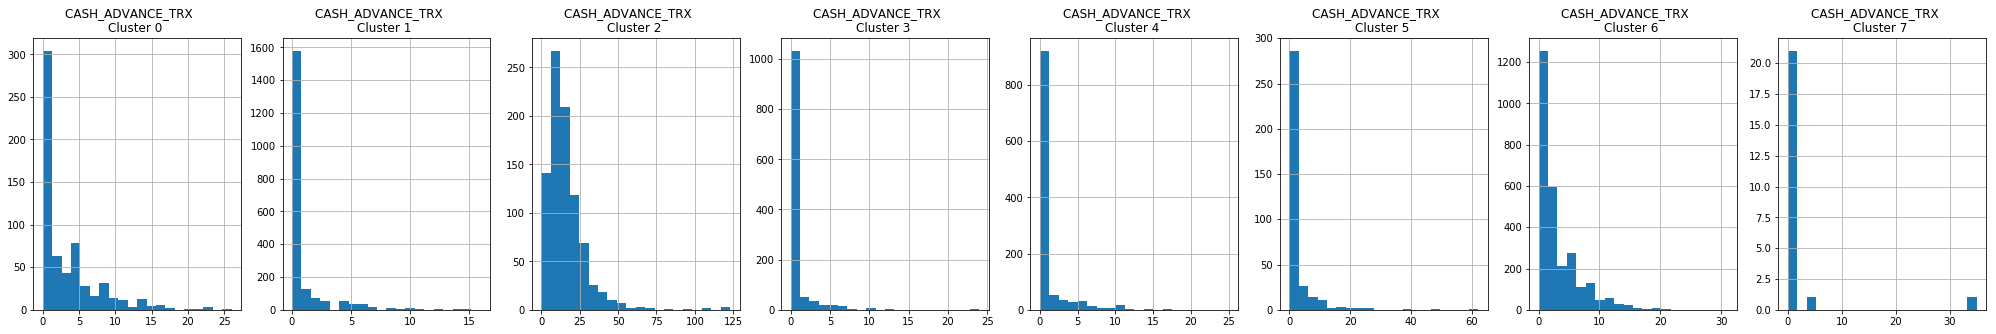

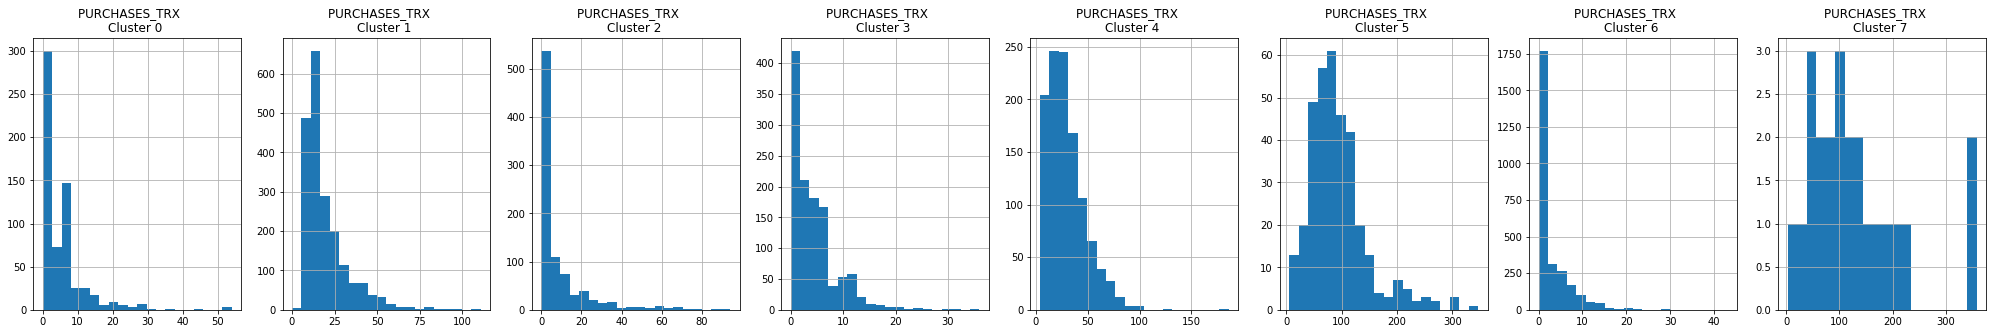

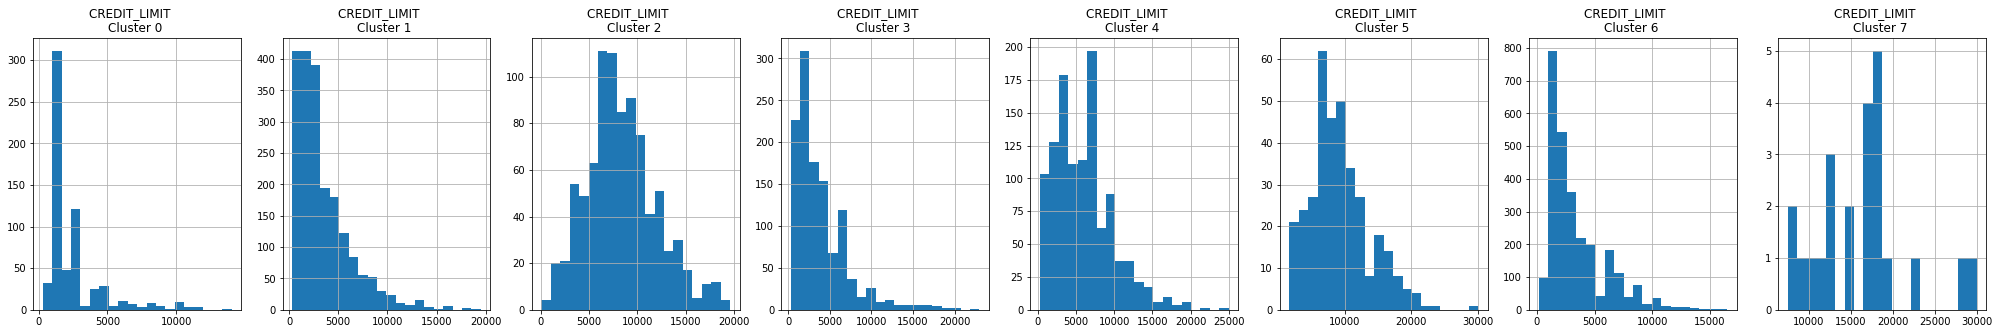

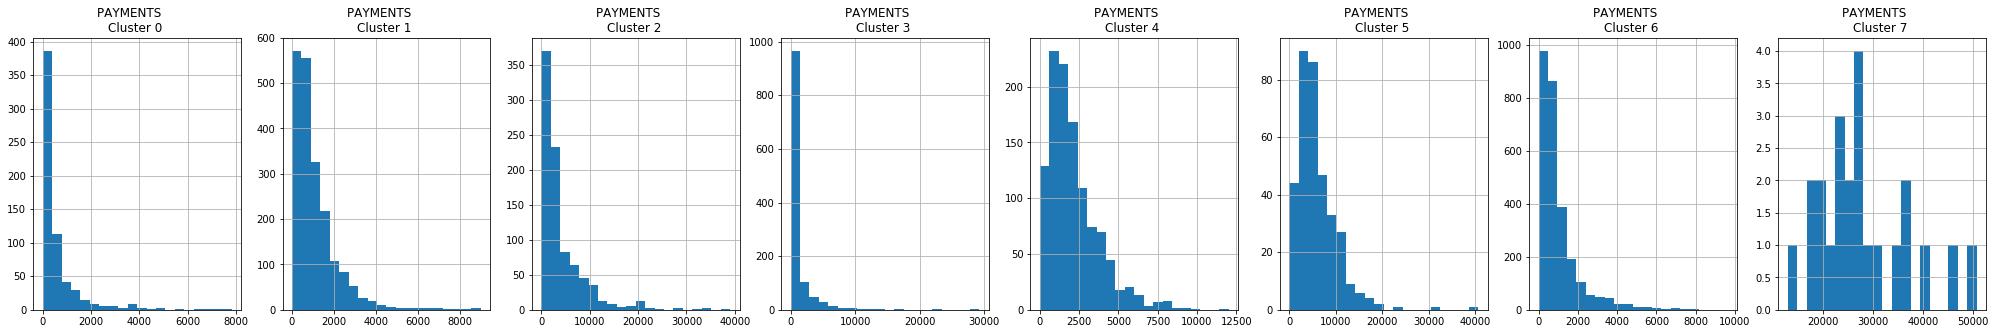

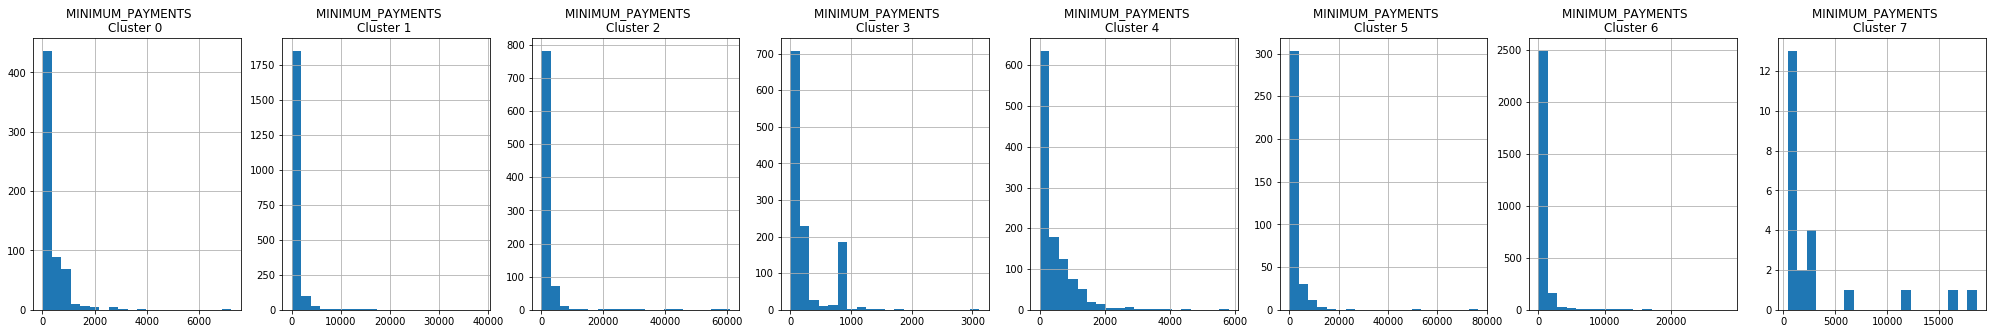

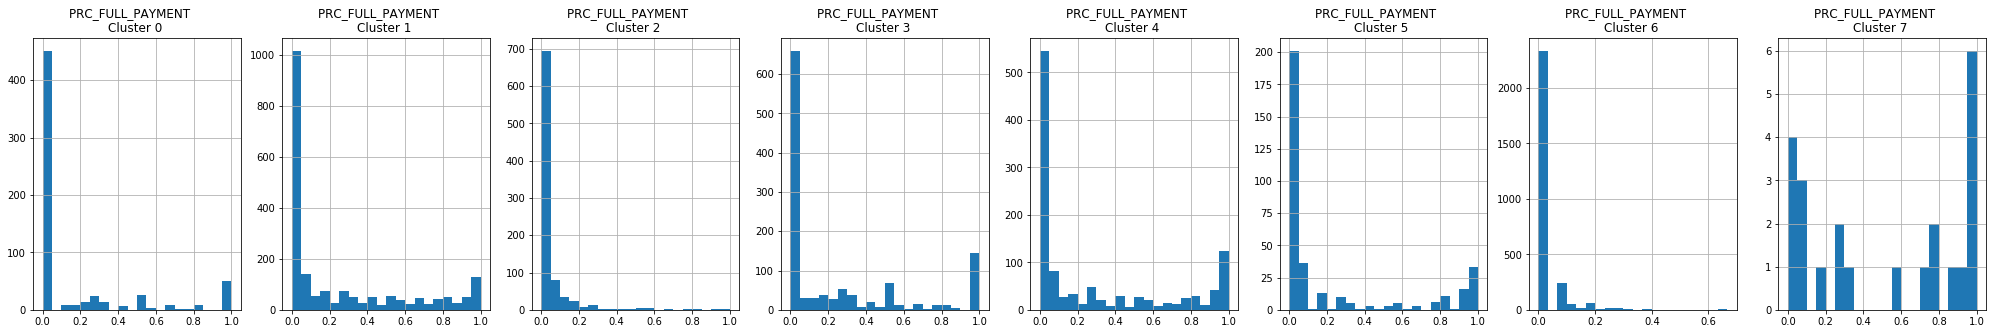

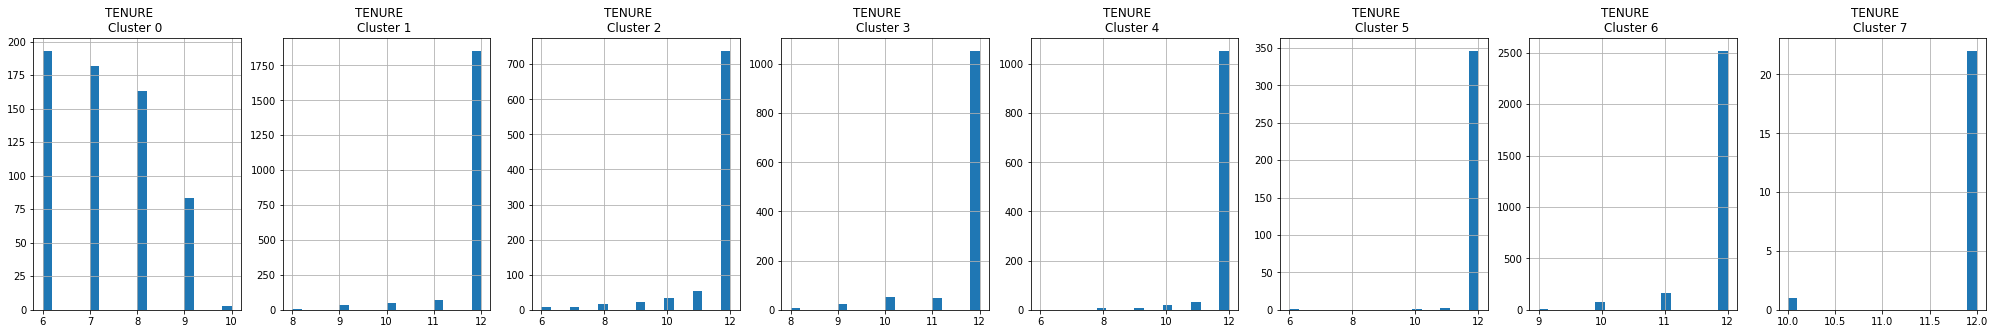

In [50]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))
  
    plt.show()

### APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [51]:
# Obtain the principal components 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.682221  , -1.07644568],
       [-1.13829784,  2.50648687],
       [ 0.96968477, -0.38353114],
       ...,
       [-0.92620324, -1.81078292],
       [-2.33655083, -0.65796285],
       [-0.55642031, -0.40047885]])

In [52]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076446
1,-1.138298,2.506487
2,0.969685,-0.383531
3,-0.873629,0.043172
4,-1.599434,-0.688577


In [53]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076446,6
1,-1.138298,2.506487,2
2,0.969685,-0.383531,4
3,-0.873629,0.043172,6
4,-1.599434,-0.688577,6


In [ ]:
plt.figure(figsize=(20,20))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

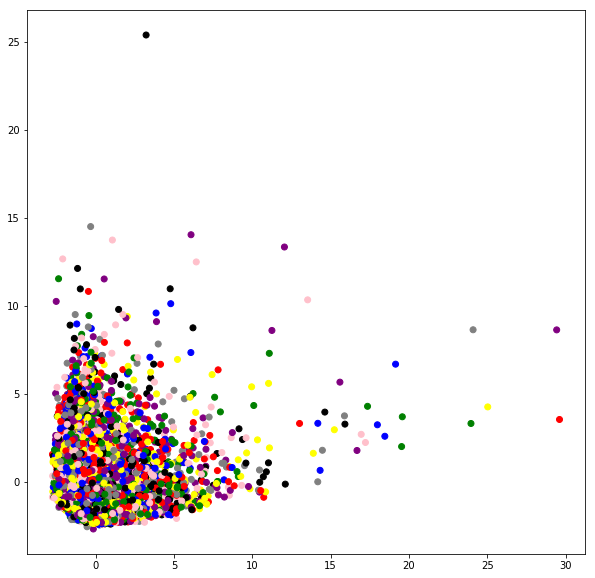

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pca1", y="pca2", label = "cluster", data = pca_df, c =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [ ]:
# plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
# plt.scatter(x[y_kmeans == 6, 0], x[y_kmeans == 6, 1], s = 100,  label = 'Cluster 7')
# plt.scatter(x[y_kmeans == 7, 0], x[y_kmeans == 7, 1], s = 100,  label = 'Cluster 8')
# #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
# plt.xlabel('pca1')
# plt.ylabel('pca2')
# plt.legend()
# plt.show()

### Thank You !